<a href="https://colab.research.google.com/github/Ibrahim-Alkhalil/hello-world/blob/master/Dates_and_Times_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Native Python dates and times: datetime and dateutil

In [11]:
from datetime import datetime
datetime(year=2018, month=10, day=30)

datetime.datetime(2018, 10, 30, 0, 0)

## using the dateutil module, you can parse dates from a variety of string formats

In [12]:
from dateutil import parser
date = parser.parse("30th of October, 2018")
date

datetime.datetime(2018, 10, 30, 0, 0)

##printing the day of the week:

In [13]:
date.strftime('%A')

'Tuesday'

##Typed arrays of times: NumPy's datetime64


In [14]:
## NumPy datetime64 arrays
import numpy as np
date = np.array('2018-08-30', dtype=np.datetime64)
date

array('2018-08-30', dtype='datetime64[D]')

In [15]:
## date formatted
## do vectorized operations
date + np.arange(12)


array(['2018-08-30', '2018-08-31', '2018-09-01', '2018-09-02',
       '2018-09-03', '2018-09-04', '2018-09-05', '2018-09-06',
       '2018-09-07', '2018-09-08', '2018-09-09', '2018-09-10'],
      dtype='datetime64[D]')

In [17]:
## minute-based datetime
np.datetime64('2015-07-04 12:00')  

numpy.datetime64('2015-07-04T12:00')

##Dates and times in pandas 


In [18]:
# We can parse a flexibly formatted string date
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [19]:
## use format codes to output the day of the week
date.strftime('%A')

'Saturday'

In [20]:
## vectorized operations directly
date + pd.to_timedelta(np.arange(12), 'D')


DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Pandas Time Series: Indexing by Time


In [29]:
## index data by timestamps
## a Series object has time indexed data
index = pd.DatetimeIndex(['2018-07-04', '2018-08-04',
                          '2018-07-04', '2018-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2018-07-04    0
2018-08-04    1
2018-07-04    2
2018-08-04    3
dtype: int64

In [31]:
## passing values that can be coerced into dates
data['2018-07-04':'2018-08-04']

2018-07-04    0
2018-08-04    1
2018-07-04    2
2018-08-04    3
dtype: int64

In [28]:
## passing a year to obtain a slice of all data from that year
data['2018']

2018-07-04    0
2018-08-04    1
2018-07-04    2
2018-08-04    3
dtype: int64

In [32]:
## use the pd.to_datetime() function, which can parse a wide variety of formats
dates = pd.to_datetime([datetime(2018, 7, 3), '4th of July, 2018',
                       '2018-Jul-6', '07-07-2018', '20180708'])
dates

DatetimeIndex(['2018-07-03', '2018-07-04', '2018-07-06', '2018-07-07',
               '2018-07-08'],
              dtype='datetime64[ns]', freq=None)

In [33]:
## the to_period() function with frequency code
## use 'D' to indicate daily frequency
dates.to_period('D')

PeriodIndex(['2018-07-03', '2018-07-04', '2018-07-06', '2018-07-07',
             '2018-07-08'],
            dtype='period[D]', freq='D')

In [34]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [35]:
dates.to_period('D')

PeriodIndex(['2018-07-03', '2018-07-04', '2018-07-06', '2018-07-07',
             '2018-07-08'],
            dtype='period[D]', freq='D')

## regular sequence of dates

In [36]:
## pd.date_range() accepts a start date, an end date, and an optional frequency code
## By default, the frequency is one day
pd.date_range('2018-07-03', '2018-07-10')

DatetimeIndex(['2018-07-03', '2018-07-04', '2018-07-05', '2018-07-06',
               '2018-07-07', '2018-07-08', '2018-07-09', '2018-07-10'],
              dtype='datetime64[ns]', freq='D')

In [38]:
## Alternatively, with a startpoint and a number of periods
pd.date_range('2018-10-03', periods=8)    # the freq argument, which defaults to D

DatetimeIndex(['2018-10-03', '2018-10-04', '2018-10-05', '2018-10-06',
               '2018-10-07', '2018-10-08', '2018-10-09', '2018-10-10'],
              dtype='datetime64[ns]', freq='D')

In [39]:
## For example, here we will construct a range of hourly timestamps
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [41]:
## create regular sequences of Period 
## pd.period_range() fnction useful for monthly periods
pd.period_range('2018-07', periods=8, freq='M')

PeriodIndex(['2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
             '2019-01', '2019-02'],
            dtype='period[M]', freq='M')

In [44]:
## a sequence of durations increasing by an hour
## pd.timedelta_range() function
## #Pandas frequency codes D (day) and H (hour) codes
pd.timedelta_range(0, periods=10, freq='H')   

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

D	Calendar day	
B	Business day
W	Weekly		
M	Month end	
BM	Business month end

Q	Quarter end	
BQ	Business quarter end

A	Year end	
BA	Business year end

H	Hours	
BH	Business hours
T	Minutes		
S	Seconds		
L	Milliseonds		
U	Microseconds		
N	nanoseconds

In [51]:
## The monthly, quarterly, and annual frequencies are all marked at the end of the specified period.
## M	Month end
## Q	Quarter end
## A	Year end
pd.date_range('2018-07-03', periods=8, freq='A')

DatetimeIndex(['2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31',
               '2022-12-31', '2023-12-31', '2024-12-31', '2025-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [48]:
## The quarterly frequency marked at the end of the specified period.
## Q	Quarter end
pd.date_range('2018-01-01', periods=8, freq='Q')

DatetimeIndex(['2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
               '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [50]:
## By adding an S suffix to any of frequency (M Q A), will be marked at the beginning
pd.date_range('2018-01-01', periods=8, freq='QS')


DatetimeIndex(['2018-01-01', '2018-04-01', '2018-07-01', '2018-10-01',
               '2019-01-01', '2019-04-01', '2019-07-01', '2019-10-01'],
              dtype='datetime64[ns]', freq='QS-JAN')

In [54]:
## weekly frequency can be modified by adding a three-letter weekday code
## W-SUN, W-MON, W-TUE, W-WED, etc.
pd.date_range('2018-10-01', periods=8, freq='W-WED')

DatetimeIndex(['2018-10-03', '2018-10-10', '2018-10-17', '2018-10-24',
               '2018-10-31', '2018-11-07', '2018-11-14', '2018-11-21'],
              dtype='datetime64[ns]', freq='W-WED')

In [67]:
## Additionally, you can change the month used to mark any quarterly or annual code
## by adding a three-letter month code as a suffix 
## Q-JAN, BQ-FEB, QS-MAR, BQS-APR, etc.
## A-JAN, BA-FEB, AS-MAR, BAS-APR, etc.
pd.date_range('2018-01-01', periods=8, freq='AS-FEB')

DatetimeIndex(['2018-02-01', '2019-02-01', '2020-02-01', '2021-02-01',
               '2022-02-01', '2023-02-01', '2024-02-01', '2025-02-01'],
              dtype='datetime64[ns]', freq='AS-FEB')

In [68]:
## we can combine the hour (H) and minute (T) codes 
## For example, for a frequency of 2 hours 30 minutes
pd.timedelta_range(0, periods=9, freq="2H30T")


TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [71]:
## pd.tseries.offsets module
from pandas.tseries.offsets import BDay
pd.date_range('2018-10-01', periods=10, freq=BDay())  # BDaya business day offset

DatetimeIndex(['2018-10-01', '2018-10-02', '2018-10-03', '2018-10-04',
               '2018-10-05', '2018-10-08', '2018-10-09', '2018-10-10',
               '2018-10-11', '2018-10-12'],
              dtype='datetime64[ns]', freq='B')

##Resampling, Shifting, and Windowing


In [0]:
## pandas-datareader package (installable via conda install pandas-datareader)

In [6]:
!pip install pandas-datareader

    100% |████████████████████████████████| 112kB 2.7MB/s 
    100% |████████████████████████████████| 5.8MB 5.1MB/s 


In [17]:
import pandas_datareader as pdr

# Here we will load Yahoo's closing price history:
df = pdr.get_data_yahoo('005930.KS', '2018-05-01', '2018-10-30')

print('row count:', len(df))
df.head(10)


row count: 120


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-05-02,53000.0,53000.0,53000.0,53000.0,0.0,52608.718750
2018-05-03,53000.0,53000.0,53000.0,53000.0,0.0,52608.718750
2018-05-04,53900.0,51800.0,53000.0,51900.0,39565391.0,51516.839844
2018-05-08,53200.0,51900.0,52600.0,52600.0,23104720.0,52211.671875
2018-05-09,52800.0,50900.0,52600.0,50900.0,16128305.0,50524.222656
2018-05-10,51700.0,50600.0,51700.0,51600.0,13905263.0,51219.054688
2018-05-11,52200.0,51200.0,52000.0,51300.0,10314997.0,50921.269531
2018-05-14,51100.0,49900.0,51000.0,50100.0,14909272.0,49730.128906
2018-05-15,50400.0,49100.0,50200.0,49200.0,18709146.0,48836.773438


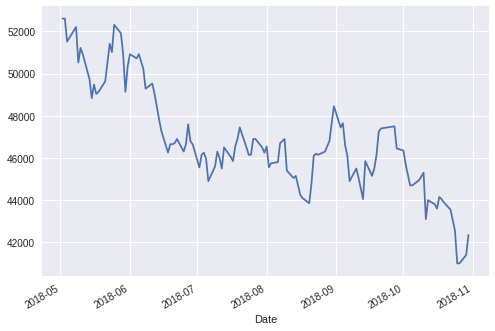

In [18]:
# For simplicity, we'll use just the closing price:
df['Adj Close'].plot()

In [0]:
# visualize this using the plot()
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

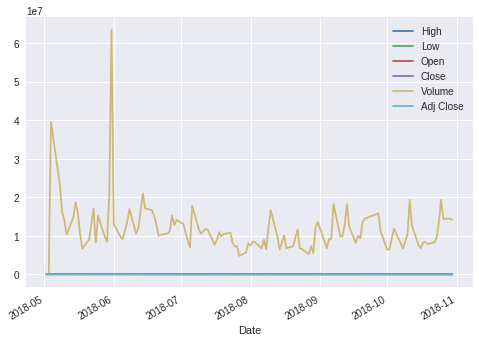

In [19]:
df.plot();

##Resampling and converting frequencies
